Name : Jegakumaran P.                 
Index Number : 190280N

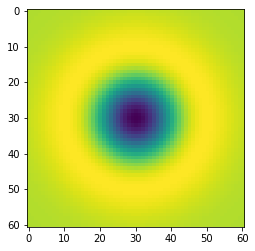

In [1]:
import numpy as np
import matplotlib.pyplot as plt

sigma=10
hw=3*sigma
X,Y=np.meshgrid(np.arange(-hw,hw+1,1),np.arange(-hw,hw+1,1))
log=1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) -2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
plt.imshow(log)

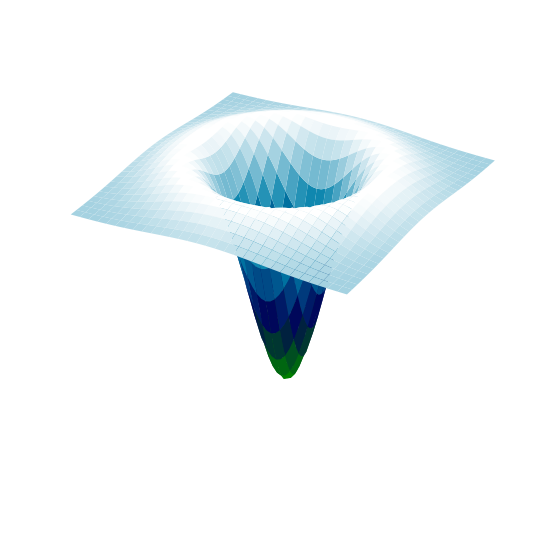

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection="3d")

surf=ax.plot_surface(X,Y,log,cmap=cm.ocean,linewidth=0,antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
plt.axis("off")
plt.show()

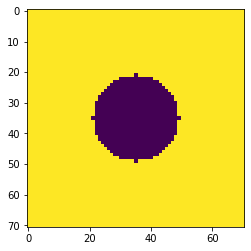

In [3]:
#Generating circle
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

w,h=71,71
hw=w//2
hh=h//2

f=np.ones((h,w),dtype=np.float32)*255
X,Y=np.meshgrid(np.arange(-hh,hh+1,1),np.arange(-hw,hw+1,1))

r=w//5
f+=X**2+Y**2 > r**2

plt.imshow(f)

(35, 35, 4)
9


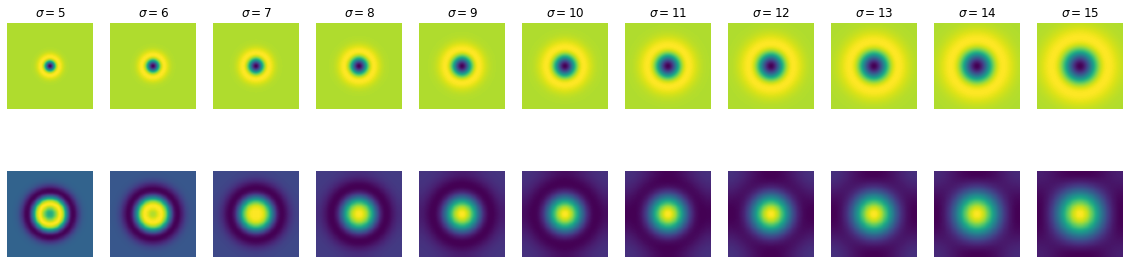

In [4]:
s=11
fig,ax=plt.subplots(2,s,figsize=(20,5))
scale_space = np.empty((h,w,s),dtype=np.float32)
sigmas=np.arange(5,16,1)
for i,sigma in enumerate(sigmas):
    log_hw=3*np.max(sigmas)
    X,Y=np.meshgrid(np.arange(-log_hw,log_hw+1,1),np.arange(-log_hw,log_hw+1,1))
    log=1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) -2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
    f_log=cv.filter2D(f,-1,log)
    scale_space[:,:,i] = f_log
    ax[0,i].imshow(log)
    ax[0,i].axis("off")
    ax[0,i].set_title(r'$\sigma = {}$'.format(sigma))
    ax[1,i].imshow(f_log)
    ax[1,i].axis("off")

indices=np.unravel_index(np.argmax(scale_space,axis=None),scale_space.shape)
print(indices)
print(sigmas[indices[2]])

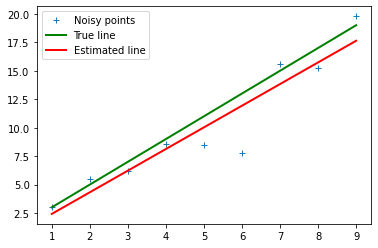

In [5]:
#Least-squares line fitting

m = 2 # Line equation : y = m*x + c .mistheslope.cistheintercept.
c = 1
x = np.arange(1 ,10 , 1)
np.random.seed(45)
sigma=1
noise = 2.*np.random.randn(len(x))
o=np.zeros(x.shape) #o[-1]=20
y=m*x+c+noise+o

n=len(x)
X=np.concatenate([x.reshape(n,1),np.ones((n,1))],axis=1)
B=np.linalg.pinv(X.T@X)@X.T@y
mstar=B[0]
cstar=B[1]

plt.plot(x,y,'+',label='Noisy points')
plt.plot([x[0],x[-1]],[m*x[0] + c , m*x[-1] + c],color="g",linewidth=2,label=r'True line')
plt.plot([x[0],x[-1]],[mstar*x[0] + cstar , mstar*x[-1] + cstar],color="r",linewidth=2,label=r'Estimated line')
plt.legend(loc='best')
plt.show()

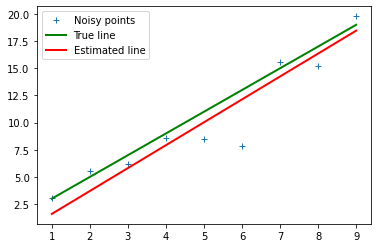

In [6]:
m = 2 # Line equation : y = m*x + c .mistheslope.cistheintercept.
c = 1
x = np.arange(1 ,10 , 1)
np.random.seed(45)
sigma=1
noise = 2.*np.random.randn(len(x))
o=np.zeros(x.shape) #o[-1]=20
y=m*x+c+noise+o

n=len(x)

u11=np.sum((x-np.mean(x))**2)
u12=np.sum((x-np.mean(x))*(y-np.mean(y)))
u21=u12
u22=np.sum((y-np.mean(y))**2)

u=np.array([[u11,u12],[u21,u22]])
w,v=np.linalg.eig(u)

ev_corresponding_to_smallest_ev=v[:,np.argmin(w)]

a=ev_corresponding_to_smallest_ev[0]
b=ev_corresponding_to_smallest_ev[1]
d=a*np.mean(x) + b*np.mean(y)

mstar=-a/b
cstar=d/b

plt.plot(x,y,'+',label='Noisy points')
plt.plot([x[0],x[-1]],[m*x[0] + c , m*x[-1] + c],color="g",linewidth=2,label=r'True line')
plt.plot([x[0],x[-1]],[mstar*x[0] + cstar , mstar*x[-1] + cstar],color="r",linewidth=2,label=r'Estimated line')
plt.legend(loc='best')

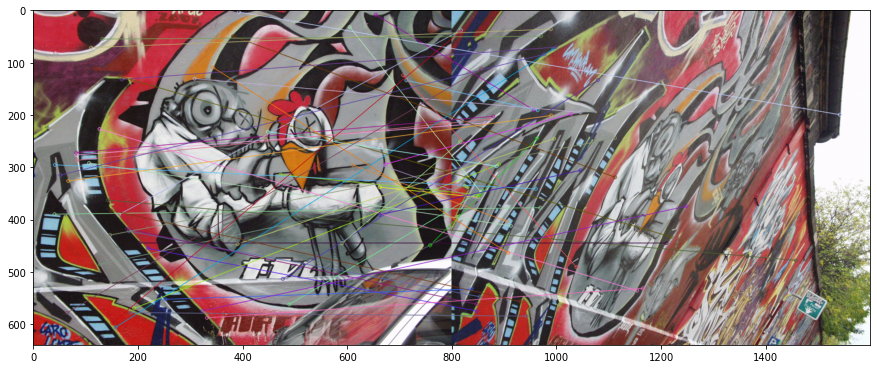

(<matplotlib.image.AxesImage at 0x22d1fbdfbe0>, None)

In [7]:
import cv2 as cv
import matplotlib.pyplot as plt


# read images
img1 = cv.imread(r'Images/graf/img1.ppm')  
img2 = cv.imread(r'Images/graf/img6.ppm') 

img1 = cv.cvtColor(img1, cv.IMREAD_GRAYSCALE)
img2 = cv.cvtColor(img2, cv.IMREAD_GRAYSCALE)

#sift
sift = cv.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.figure(figsize=(15,8))
plt.imshow(cv.cvtColor(img3,cv.COLOR_BGR2RGB)),plt.show()